### The Extened Euclid's Algorithm Complexity

We start by defining the algorithm itself:

In [1]:
def ext_euc(m,n):
    
    #check pre-conditions
    if m<=0 or n<=0 or m!=int(m) or n!=int(n):
        raise ValueError("Invalid inputs for Euclid's.")
    
    #algorithm
    c = m
    d = n
    a = 0
    x = 1
    b = 1
    y = 0
    while(True):
        q = int(c/d) #rounds down
        r = c%d
        if r == 0:
            return (a,b)            
        c = d
        d = r
        h = x
        x = a
        a = h - q * a
        h = y
        y = b
        b = h - q * b

Our intention, however, is not to find $a$ and $b$, but to evaluate the complexity of the algorithm. First, we'll see how the number of "steps" correlates with the size of the input. This requires a modified version of the algorithm, with 2 changes:
<ul>
<li> The $steps$ variable has been added. </li>
<li> The return has been changed to $steps$; we don't care about $a$ and $b$, only the complexity. </li>
</ul>

In [2]:
def ext_euc_step_count(m,n):
    
    steps = 4 #4 checks above
    if m<=0 or n<=0 or m!=int(m) or n!=int(n):
        raise ValueError("Invalid inputs for Euclid's.")
        
    c = m
    d = n
    a = 0
    x = 1
    b = 1
    y = 0
    steps += 6 #6 assignments above
    while(True):
        q = int(c/d) 
        r = c%d
        steps += 4 #2 assignments above, r==0 check below, 1 divsion (treating c%d as a by-product of the division)
        if r == 0:
            return steps            
        c = d
        d = r
        h = x
        x = a
        a = h - q * a
        h = y
        y = b
        b = h - q * b
        steps += 12 #8 assignments, 2 multiplications, 2 subtractions above

Now that we've developed the necessary tools, we can gather some data:

In [3]:
from random import randint

data = dict()
size = 1
sample_size = 1000
while size < 50:
    sample = 0
    sample_total = 0
    while sample < sample_size:
        m = randint(2**(size-1),(2**size)-1)
        n = randint(1,m)
        sample_total += ext_euc_step_count(m,n)
        sample += 1
    data[size] = sample_total/sample_size
    size += 1

Finally, we can plot what we've found:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

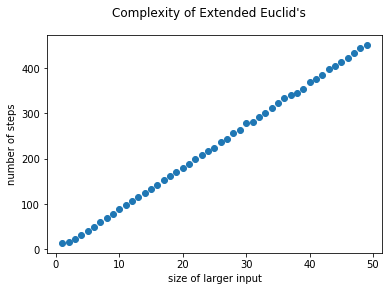

In [5]:
#organize data
X = list(data)
Y = [data[x] for x in X]

#setup figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('size of larger input')
ax.set_ylabel('number of steps')
fig.suptitle('Complexity of Extended Euclid\'s')

#plot data
ax.plot(X,Y,'o')

plt.show()

We can see that the number of steps scales linearly with the size of the larger input. Of course, as the "size" is the length of the binary encoding, this means that the number of steps actually scales logarithmically with the larger input.

Of course, in this implementation, we've "skipped" the division, as the complexity of the division algorithm used impacts the complexity of Euclid's. Below, we have a revised version, with one change: We've calculate $r$ and $q$ manually, using the division algorithm provided in Algorithm 1.1, and updated the additions to $steps$ to match.

In [6]:
def ext_euc_step_count_with_division(m,n):
    
    if m<=0 or n<=0 or m!=int(m) or n!=int(n):
        raise ValueError("Invalid inputs for Euclid's.")
    steps = 4 #4 checks above
    
    c = m
    d = n
    a = 0
    x = 1
    b = 1
    y = 0
    steps += 6 #6 assignments before loop
    while(True):
        q = 0
        r = c
        steps += 4 #2 assignments above, first d<=r and r==0 check below
        while d <= r:
            r -= d
            q += 1
            steps += 3 #2 assignments, next d<=r check
        if r == 0:
            return steps #we only care how many steps were made, in the end
        c = d
        d = r
        h = x
        x = a
        a = h - q * a
        h = y
        y = b
        b = h - q * b
        steps += 12 #8 assignments, 2 multiplications, 2 subtractions

Let's gather some data with our new model...

In [7]:
data2 = dict()
size = 1
sample_size = 1000
while size < 50:
    sample = 0
    sample_total = 0
    while sample < sample_size:
        m = randint(2**(size-1),(2**size)-1)
        n = randint(1,m)
        sample_total += ext_euc_step_count_with_division(m,n)
        sample += 1
    data2[size] = sample_total/sample_size
    size += 1

and plot it...

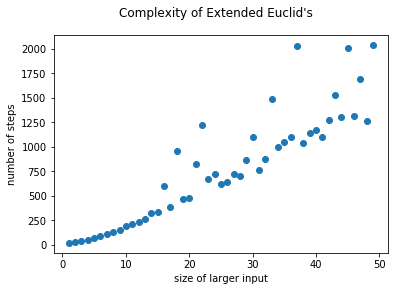

In [8]:
#organize data
X = list(data2)
Y = [data2[x] for x in X]

#setup figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('size of larger input')
ax.set_ylabel('number of steps')
fig.suptitle('Complexity of Extended Euclid\'s')

#plot data
ax.plot(X,Y,'o')

plt.show()

Note that rerunning the data-gathering portion of this procedure will greatly effect the results. You can also adjust the maximum of the larger input, as well as the sample size, above. We've saved the result with $size<50$ and $sample\_size=10^6$:

![title](results_steps_with_division.png)

Even at $10^6$, the sample size isn't large enough to remove noise. More importantly, however, the data appears to be slightly concave up. Let's explore why. It appears that Euclid's algorithm's iteration count is $O(l)$, where $l$ is the length of the larger inputs binary encoding, or identically $O(\log(n))$, where $n$ is the larger input (and this could be proven, without too much difficulty). But nesting the division algorithm in each iteration causes this complexity to be multiplied by the complexity of the chosen division algorithm. Our chosen division method, Algorithm 1.1, is $O(n)$ (identically $O(2^l)$), so the resulting composite algorithm is $O(n\log(n))$ or $O(l2^l)$. So the concavity is explained: the graph above is approximately exponential, with some noise.